<a href="https://www.kaggle.com/code/muskanchugh7/simple-linear-regression-model?scriptVersionId=96290831" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Linear Regression

Simple Linear Regression model on 'Auto Insurance in Sweden' Dataset <br /> <br />
In the dataset, <br />
X = number of claims <br />
Y = total payment for all the claims in thousands of Swedish Kronor for geographical zones in Sweden <br />

References: <br /> 

Website  url : https://data.world/ <br />
Dataset url : https://query.data.world/s/s6dnypkx2qy7i4msmfqudasc6awuv6 <br />

In [2]:
# Import relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
#setting matplotlib parameters for better visualization of graphs
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.color':'white',
         'ytick.color':'white'
         }

plt.rcParams.update(params)
%matplotlib inline

In [4]:
# data input
url="https://query.data.world/s/s6dnypkx2qy7i4msmfqudasc6awuv6"
df=pd.read_csv(url,header=None)
df.columns=['NumOfClaims','TotalPayment']

In [5]:
df.head()

,NumOfClaims,TotalPayment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [6]:
# shape of the dataset
df.shape

(63, 2)

In [7]:
# general summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   NumOfClaims   63 non-null     int64  
 1   TotalPayment  63 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [8]:
# detailed summary of the dataset
df.describe()

,NumOfClaims,TotalPayment
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


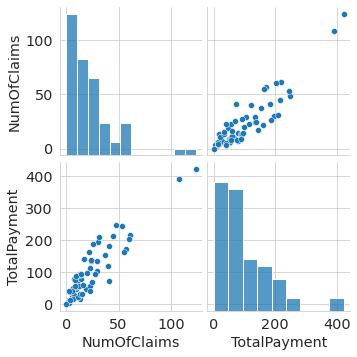

In [9]:
# visualization of data
sns.set_style("whitegrid")
sns.pairplot(df)

The above plot shows that our data has outliers <br />
Since, Linear Regression is sensitive to outliers, let's remove them for better performance

In [10]:
# Remove outliers 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [11]:
# shape of data after removing outliers
df.shape

(61, 2)

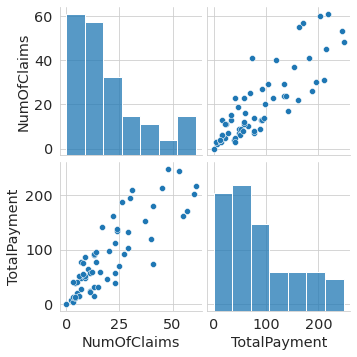

In [12]:
# visualization of data after removing outliers
sns.pairplot(df)

In [13]:
# extract X (feature variable) and Y (target variable) from dataframe
X= df.iloc[:,0]
Y= df.iloc[:,-1]

In [14]:
print(X.shape)
print(Y.shape)

(61,)
(61,)


In [15]:
#split the data into train and test
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [16]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(48,)
(48,)
(13,)
(13,)


In [17]:
# Linear Regression model
lr= LinearRegression()
lr.fit(X_train.to_numpy().reshape(-1, 1),Y_train)

LinearRegression()

In [18]:
# prediction on test data
pred=lr.predict(X_test.to_numpy().reshape(-1, 1))

In [19]:
# dataframe to compare the difference between predicted values  and actual values
df_result=pd.DataFrame(list(zip(pred,Y_test)),columns=['predicted_values','actual_values'])
print(df_result)

    predicted_values  actual_values
0          33.912088           12.6
1          86.050873           46.2
2          30.436169           39.9
3          51.291683           87.4
4          44.339845           77.5
5          47.815764           76.1
6          61.719440           58.1
7          20.008412            0.0
8          65.195359           31.9
9          96.478631          161.5
10         65.195359           15.7
11         40.863926           14.6
12         58.243521           21.3


We can observe that the model is not performing good

Text(0, 0.5, 'Total Payment')

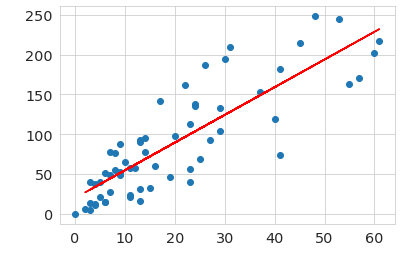

In [20]:
# plotting the fit line
plt.scatter(df['NumOfClaims'],df['TotalPayment'])
plt.plot(X_train,lr.predict(X_train.to_numpy().reshape(-1, 1)),color='red')
plt.xlabel("Number Of Claims",color='white')
plt.ylabel("Total Payment",color='white')

In [21]:
# slope of the fit line
m = lr.coef_
print(m)

[3.47591902]


In [22]:
# intercept of the fit line
b= lr.intercept_
print(b)

20.008412057292304


In [23]:
print("RMSE",np.sqrt(mean_squared_error(Y_test,pred)))

RMSE 34.62932309349265


=> Feature variable X is only able to explain 34.62% variation in the Target variable Y